# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Import Dataset

In [2]:
Google_df = pd.read_csv(r'C:\Users\HP\Downloads\Google_Ads.csv')
Listing_df = pd.read_csv(r'C:\Users\HP\Downloads\Listing_Sites.csv')

# Data Cleaning and Preprocessing

In [3]:
print(Google_df.columns)
print(Listing_df.columns)

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country'],
      dtype='object')
Index(['Product Name', 'Categories', 'Date of Report', 'Average Position',
       'Clicks', 'Leads', 'Money Spent ($)', 'Channel', 'Location',
       'Prospects', 'Paid', 'Paid Date'],
      dtype='object')


In [4]:
Google_df.info()

Listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Week            418 non-null    object 
 1   Campaign        418 non-null    object 
 2   Ad group        418 non-null    object 
 3   Keyword type    418 non-null    object 
 4   Search Keyword  418 non-null    object 
 5   Currency        418 non-null    object 
 6   Clicks          418 non-null    int64  
 7   Impressions     418 non-null    int64  
 8   Cost ($)        418 non-null    float64
 9   Leads           418 non-null    int64  
 10  Prospects       418 non-null    int64  
 11  Payment ($)     8 non-null      object 
 12  Payment Date    8 non-null      object 
 13  Country         418 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 45.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   

**Specifying date format**

In [5]:
Google_df['Week'] = pd.to_datetime(Google_df['Week'], format='mixed', dayfirst=True)

In [6]:
Listing_df['Date of Report'] = pd.to_datetime(Listing_df['Date of Report'], format='mixed', dayfirst=True)

**Combining the two datasets**

In [7]:
combined_data = pd.concat([Google_df, Listing_df], ignore_index=True)
print(combined_data.columns)

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country', 'Product Name', 'Categories',
       'Date of Report', 'Average Position', 'Money Spent ($)', 'Channel',
       'Location', 'Paid', 'Paid Date'],
      dtype='object')


In [8]:
combined_data.rename(columns={"Cost ($)": "Spends ($)"}, inplace=True)


In [9]:
combined_data["Returns (%)"] = combined_data["Spends ($)"].apply(lambda x: x / 100)

# Data Aggregation

In [10]:
combined_data.describe()

,Week,Clicks,Impressions,Spends ($),Leads,Prospects,Date of Report,Average Position,Money Spent ($),Returns (%)
count,418,2508.000000,418.000000,418.000000,581.000000,484.000000,2091,2090.000000,2089.000000,418.000000
mean,2021-03-13 17:51:23.253588736,1.540670,16.662679,6.671483,0.340792,0.183884,2021-01-27 13:47:05.251075840,10.731464,12.074318,0.066715
min,2021-01-25 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,2020-10-20 00:00:00,0.000000,2.000000,0.000000
25%,2021-02-15 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,2020-12-08 00:00:00,3.000000,2.000000,0.000000
50%,2021-03-15 00:00:00,1.000000,3.000000,0.000000,0.000000,0.000000,2021-01-20 00:00:00,8.000000,7.250000,0.000000
75%,2021-04-05 00:00:00,2.000000,12.000000,6.800000,1.000000,0.000000,2021-03-07 00:00:00,13.000000,12.250000,0.068000
max,2021-05-03 00:00:00,80.000000,357.000000,92.090000,6.000000,3.000000,2021-12-04 00:00:00,74.000000,1460.000000,0.920900
std,NaN,2.684058,46.743636,14.253019,0.593823,0.433184,NaN,11.219817,39.172291,0.142530


**Calculating Returns**

In [11]:
combined_data['Returns %'] = (combined_data['Leads'] / combined_data['Clicks']) * 100

In [12]:
combined_data.dropna(subset=["Returns %"], inplace=True)

**Creating Weekly Reports**

In [13]:
weekly_report = combined_data.groupby("Week").agg({
    "Spends ($)": "sum",
    "Leads": "sum",
    "Returns %": "sum"
}).reset_index()
print(weekly_report)

         Week  Spends ($)  Leads   Returns %
0  2021-01-25      154.79    1.0  100.000000
1  2021-02-01      192.58    0.0    0.000000
2  2021-02-08      216.13    0.0    0.000000
3  2021-02-15      235.30    0.0    0.000000
4  2021-02-22      190.90    0.0    0.000000
5  2021-03-01      141.40    0.0    0.000000
6  2021-03-08      258.20    3.0  183.333333
7  2021-03-15      184.36    1.0   12.500000
8  2021-03-22      308.73    1.0   50.000000
9  2021-03-29      172.11    0.0    0.000000
10 2021-04-05      176.96    2.0  133.333333
11 2021-04-12      137.21    1.0   11.111111
12 2021-04-19       87.38    1.0  100.000000
13 2021-04-26      103.26    1.0   20.000000
14 2021-05-03      229.37    1.0   20.000000


**Creating Monthly Report**

In [14]:
combined_data["Month"] = combined_data["Week"].dt.month

In [15]:
monthly_report = combined_data.groupby("Month").agg({
    "Spends ($)": "sum",
    "Leads": "sum",
    "Returns %": "mean",
 }).reset_index()

print(monthly_report)

   Month  Spends ($)  Leads  Returns %
0    1.0      154.79    1.0  11.111111
1    2.0      834.91    0.0   0.000000
2    3.0     1064.80    5.0   4.469697
3    4.0      504.81    5.0   7.555556
4    5.0      229.37    1.0   1.538462


# Profitability Analysis

**Most Profitable Channel**

In [16]:
most_profitable_channel = combined_data.groupby("Channel")["Spends ($)"].sum()
most_profitable_channel = most_profitable_channel.sort_values(ascending=False)
print(most_profitable_channel.to_string())


Channel
Capterra           0.0
GetApp             0.0
Software Advice    0.0


**Most Profitable Keyword**

In [17]:
most_profitable_category_keyword = combined_data.groupby("Categories")["Returns %"].mean().idxmax()
print(most_profitable_category_keyword)

Club Management


# Comprehensive Weekly and Monthly Report

**Weekly Metrics**

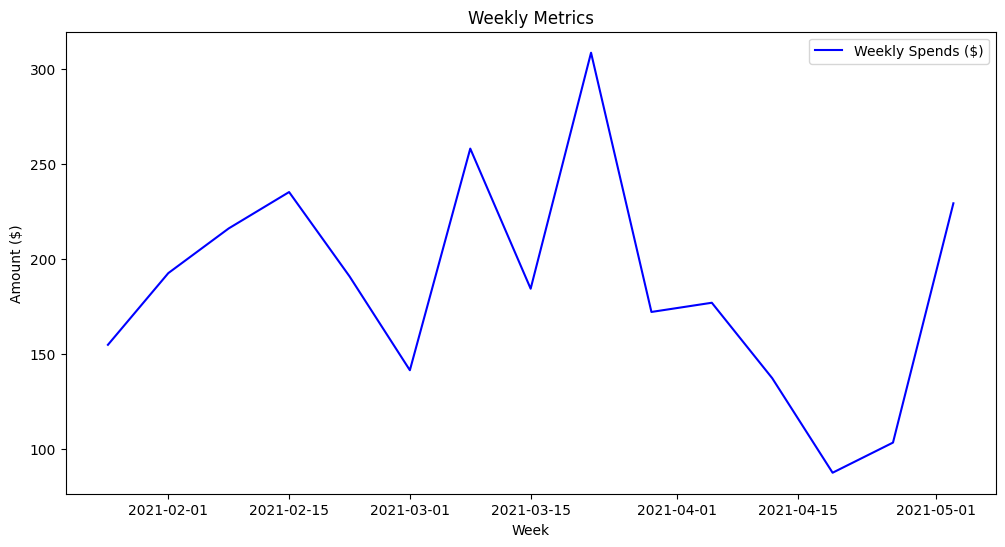

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_report["Week"], weekly_report["Spends ($)"], label="Weekly Spends ($)", color="blue")
plt.xlabel("Week")
plt.ylabel("Amount ($)")
plt.title("Weekly Metrics")
plt.legend()
plt.show()

**Monthly Metrics**

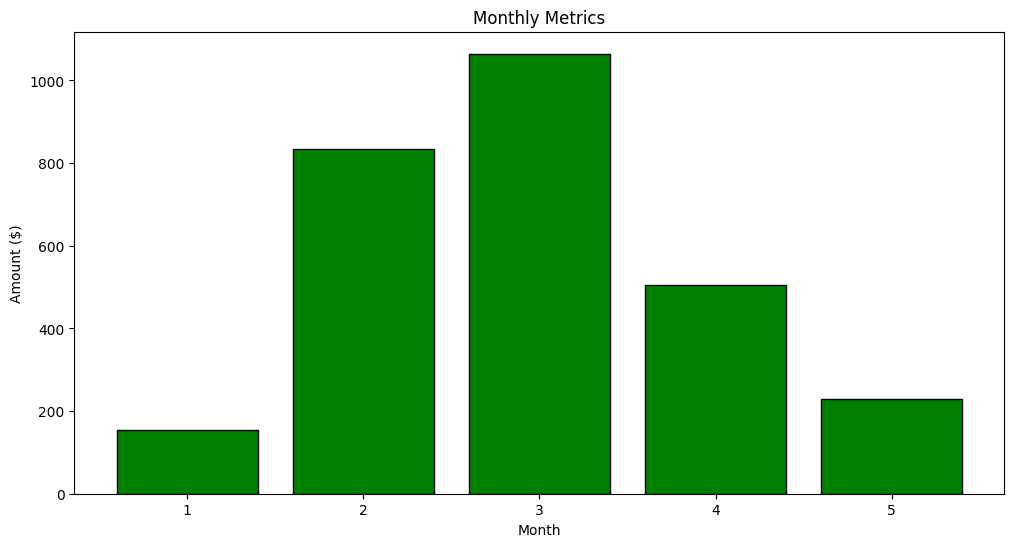

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_report["Month"], monthly_report["Spends ($)"], color="green", edgecolor="black")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.title("Monthly Metrics")
plt.show()


# Time series graph

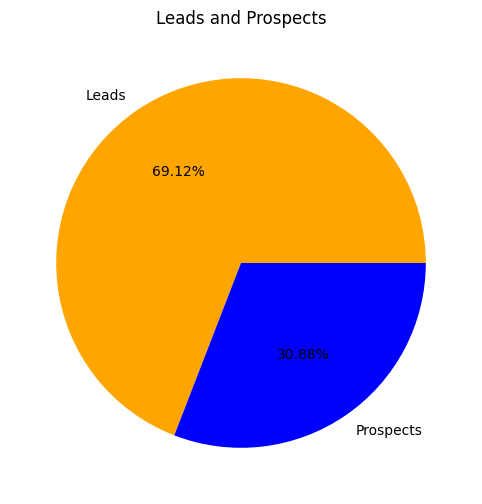

In [20]:
plt.figure(figsize=(12, 6))
leads = combined_data["Leads"].sum()
prospects = combined_data["Prospects"].sum()
labels = ["Leads", "Prospects"]
sizes = [leads, prospects]
colors = ["Orange", "blue"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Leads and Prospects")
plt.show()

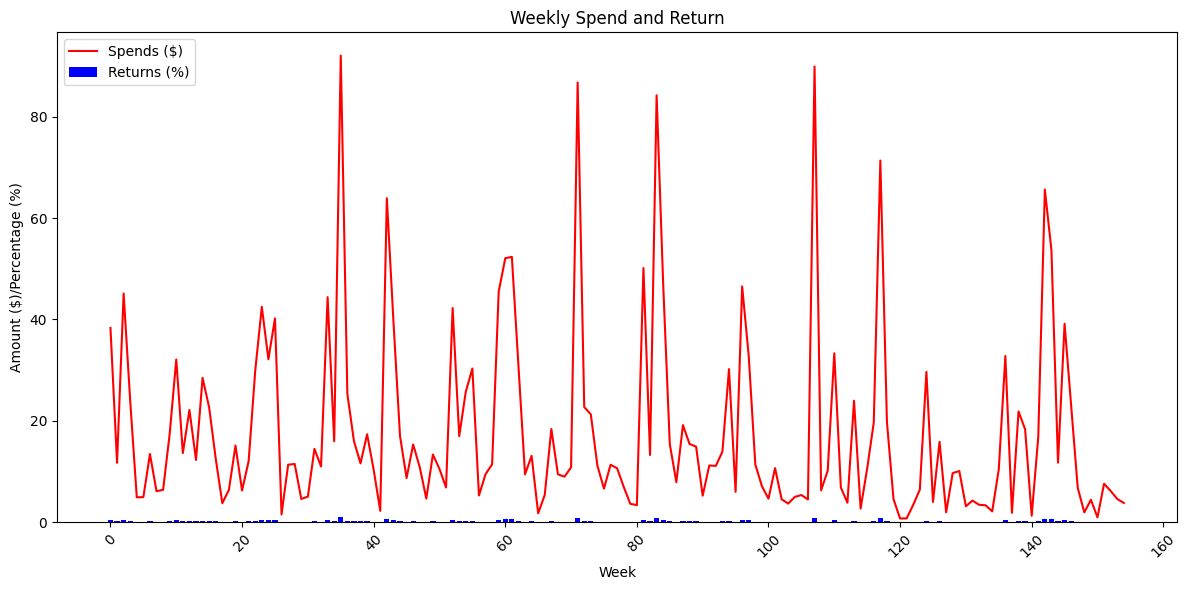

In [21]:
plt.figure(figsize=(12, 6))
spends = combined_data["Spends ($)"].to_numpy()
returns = combined_data["Returns (%)"].to_numpy()
x_axis = np.arange(len(spends))
plt.plot(x_axis, spends, color="red", label="Spends ($)")
plt.bar(x_axis, returns, color="blue", alpha=1, label="Returns (%)")
plt.title("Weekly Spend and Return")
plt.xlabel("Week")
plt.ylabel("Amount ($)/Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# impact of geography

In [22]:
geo_analysis = combined_data.groupby("Location")["Spends ($)"].sum()
geo_analysis = geo_analysis.sort_values(ascending=False)
print(geo_analysis.to_string())

Location
AUSTRALIA         0.0
CANADA            0.0
Canada            0.0
Middle East       0.0
SINGAPORE         0.0
Singapore         0.0
UNITED KINGDOM    0.0
UNITED STATES     0.0
United Kingdom    0.0
United States     0.0


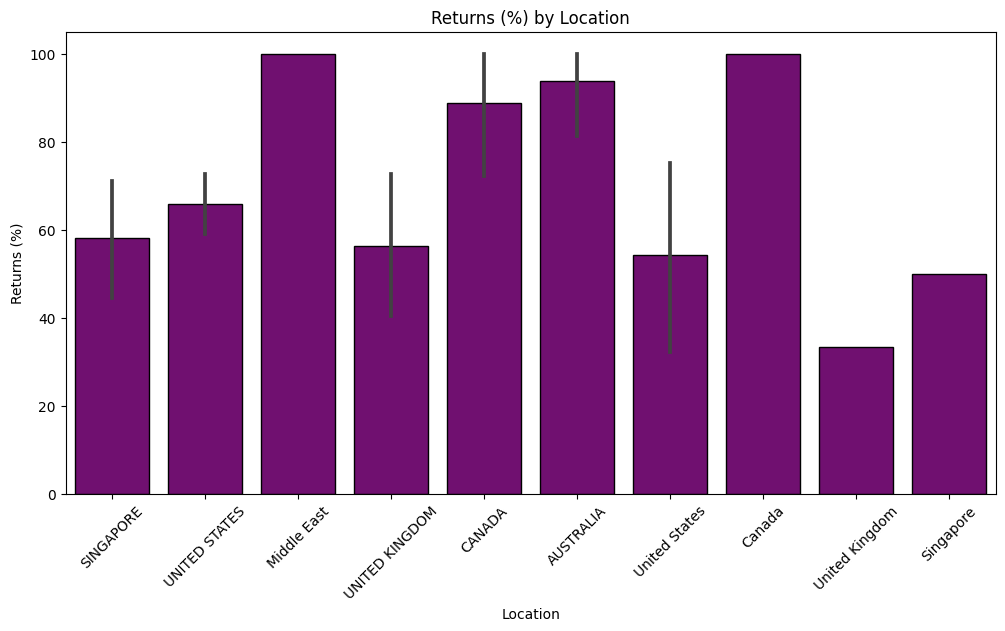

In [23]:
valid_data = combined_data[combined_data["Returns %"] >= 0]
plt.figure(figsize=(12, 6))
sns.barplot(
    data=valid_data,
    x="Location",
    y="Returns %",
    color="purple",
    edgecolor="black",
)
plt.title("Returns (%) by Location")
plt.xlabel("Location")
plt.ylabel("Returns (%)")
plt.xticks(rotation=45)
plt.show()